# Hypothesis tests and z-scores
- z-scores
  - standardized value = value-mean/standard deviation
  - sample stat - hypoth.param.value/standard error
- hypothesis testing use case:
  - determine whether sample statistics are close to or far away from expected (of 'hypothesized' values)
- standard normal (z) distribution : normal distribution with mean = 0+standard deviation =1 

In [83]:
import pandas as pd
late_shipments = pd.read_feather('late_shipments.feather')
stack_overflow = pd.read_feather('stack_overflow.feather')
sample_dem_data = pd.read_feather('dem_votes_potus_12_16.feather')
us_rep_vote_08_12 = pd.read_feather('repub_votes_potus_08_12.feather')


In [2]:
# Print the late_shipments dataset
print(late_shipments)

# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late']=='Yes').mean()

# Print the results
print(late_prop_samp)

          id       country managed_by  fulfill_via vendor_inco_term   
0    36203.0       Nigeria   PMO - US  Direct Drop              EXW  \
1    30998.0      Botswana   PMO - US  Direct Drop              EXW   
2    69871.0       Vietnam   PMO - US  Direct Drop              EXW   
3    17648.0  South Africa   PMO - US  Direct Drop              DDP   
4     5647.0        Uganda   PMO - US  Direct Drop              EXW   
..       ...           ...        ...          ...              ...   
995  13608.0        Uganda   PMO - US  Direct Drop              DDP   
996  80394.0    Congo, DRC   PMO - US  Direct Drop              EXW   
997  61675.0        Zambia   PMO - US  Direct Drop              EXW   
998  39182.0  South Africa   PMO - US  Direct Drop              DDP   
999   5645.0      Botswana   PMO - US  Direct Drop              EXW   

    shipment_mode  late_delivery late product_group    sub_classification   
0             Air            1.0  Yes          HRDT              HIV t

In [3]:
import numpy as np 
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

late_shipments_boot_distn = []
for i in range(1000): 
    late_shipments_boot_distn.append(
        np.mean((late_shipments.sample(n=500)['late']=='Yes').sample(n=500,replace=False))
    )

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn,ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp-late_prop_hyp)/std_error

# Print z_score
print(z_score)


0.12977340558825973


# p - values 
- Hypothesis alternative or null hypothesis is true(not both)
- initially H0 is assumed to be truethe test ends in either "reject H0" or "fail to reject H0" 
- if the evidence from the sample is significant that HA is true, reject H0, else choose Ho
- Significance level is "beyond a reasonable doubt" for hypothesis testing
- hypothesis tests check if the sample statistics lie in the tails of the null distribution
  1. alternative different from null == two-tailed
  2. alternative greater than null == right-tailed
  3. alternative less than null == left-tailed
- p-values: probability of obtaining a result, assuming the null hypothesis is true
- large p-values, large support for H0, statistic likely not in the tail of the null distribution
- small p-values, strong evidence against H0, statistic likely in the tail of the null distribution
- small means close to zero, p meaning probability
- how to calculate p-value?
  1. calculate z-score
  2. norm.cdf() is normal cdf from scipy.stats
     - left-tailed test --> use norm.cdf()
     - right-tailed test --> use 1 - norm.cdf()
     - two_tailed("not equal") --> use norm.cdf(-z_score)+1-norm.cdf(z_score) or 2*(1-norm.cdf(z_score))
     - from scipy.stats import norm
     - 1-norm.cdf(z_score, loc=0, scale=1) 

In [4]:
from scipy.stats import norm
# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp-late_prop_hyp)/std_error

# Calculate the p-value
p_value = 1-norm.cdf(z_score,loc=0,scale=1)
                 
# Print the p-value
print(p_value) 

0.4483728521106498


# p-value recap 
- p-values quantify evidence for the null hypothesis
- large p-value --> fail to reject null hypothesis >> not enough data to prove HA 
- small p-value --> reject null hypothesis >> enough data to prove HA
- where is the cutoff point?
  - the significance level of a hypothesis test (alpha) is the threshold point for "beyond a reasonable doubt"
  - common values of alpha --> 0.2, 0.1, 0.05, 0.01 --5% is the most common
- if p-value <= alpha then reject H0 else reject H1

- milestone
  - alpha need to be decided at the very first time before calculating p-value
  - alpha = 0.05
  - prop_child_samp = (stack_overflow['age_first_code_cut']=='child').mean()
  - prop_child_hyp = 0.35
  - std_error = np.std(first_code_boot_distn, ddof=1)
  - z_score = (prop_child_samp - prop_child_hyp)/std_error
  - p_value = 1-norm.cdf(z_score, loc=0, scale =1 )
  - P_value <= alpha then True >> reject null evidence

- confidence interval level of 1-alpha 95%
  - import numpy as np
  - lower = np.quantile(first_code_boot_distn,0.025)
  - upper = np.quantile(first_code_boot_distn,0.975)
  - print((lower,upper))

# Types of Errors 
1. Chosesn H0 == actual H0 --> Correct
2. Chosen H0 == actual HA --> False Negative (Type II Error) 
3. Chosen HA == actual H0 --> False Positive (type I Error) 
4. Chosen HA == actual HA --> Correct 

In [5]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn,0.025)
upper = np.quantile(late_shipments_boot_distn,0.975)

# Print the confidence interval
print((lower, upper))

(0.046, 0.076)


# Performing t-tests 
- two-sample problems
- H0: the mean compensation (in USD) is the same for those that coded first as a child and those that coded first as an adult H0: Mchild - Madult = 0
- HA: the mean compensation (in USD) is greater for those that coded first as a child compared to those that coded first as an adult HA: Mchild - Madult > 0
- how?
  - calculating groupwise summary statistics
  - xbar= stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()
  - n= stack_overflow.groupby('age_first_code_cut')['converted_comp'].count()
  - s= stack_overflow.groupby('age_first_code_cut')['converted_comp'].std()
  - calculate test statistics
    - sample mean estimates the population mean
    - xchild - xadult = a test statistic
    - t = (difference in sample stats - difference in population parameters) /standard error
    - import numpy as np
    - numerator = xbar_child - xbar_adult
    - denominator = np.sqrt(s_child **2/n_child + s_adult **2/n_adult)
    - t_stat = numerator/denominator 
- 

In [78]:
n = late_shipments.groupby('late')['id'].count().reset_index()
x = late_shipments.groupby('late')['weight_kilograms'].mean().reset_index()
s = late_shipments.groupby('late')['weight_kilograms'].std().reset_index()
xbar_no = x[x['late'] =='No'].iloc[0,1]
xbar_yes = x[x['late'] =='Yes'].iloc[0,1]
s_no = s[s['late']=='No'].iloc[0,1]
s_yes = s[s['late'] == 'Yes'].iloc[0,1]
n_no= n[n['late'] == 'No'].iloc[0,1]
n_yes = n[n['late'] == 'Yes'].iloc[0,1]

# Calculate the numerator of the test statistic
numerator = xbar_no-xbar_yes

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_no**2/n_no+s_yes**2/n_yes)

# # Calculate the test statistic
t_stat = numerator/denominator

# # Print the test statistic
print(t_stat)

-2.3936661778766433


# Calculating p-values from t-statistics 
- t-distributions
  - t statistic follows a t-distribution
  - have a parameter named degrees of freedom or df
  - look like normal distributions, with fatter tails
  - larger degrees of freedom --> t-distribution gets closer to the normal distribution
  - normal distribution --> t-distribution with infinite df
  - degrees of freedom : maximum number of logically independent values in the data sample
     - how to calculate df? df = n_child - n_adult -2 since there are 2 observation here
  - use t-distribution CDF not normal CDF to calculate p-values 
     - from scipy.stats import t
     - 1-t.cdf(t_stat, df = degrees_of_fredom) 

- z-statistic needed when using one sample statistic to estimate a population parameter
- t-statistic needed when using multiple sample statistics to estimate a population parameter


In [80]:
from scipy.stats import t 
# Calculate the degrees of freedom
degrees_of_freedom = n_no+n_yes-2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat,df=degrees_of_freedom)

# Print the p_value
print(p_value)

0.008432382146249523


# Paired t-tests 
- hypotheses : was the percentage of Republican candidate votes lower in 2008 than 2012
- H0 : M2008 -M2012 = 0
- HA : M2008 - M2012 <0
- Set alpha = 0.05
- Data is paired --> each voter percentage refers to the same county
- How?
  - from two sample to one
  - sample data['diff'] = sample_data['repub_percent_08'] - sample_data['repub_percent_12']
  - xbar_diff = sample_data['diff'].mean()
  - s_diff = sample_data['diff'].std()
  - n_diff = len(sample_data) 
  - df = n_diff -1
  - calculating the p-value
     - t_stat =(xbar_diff - 0)/np.sqrt(s_diff**2/n_diff)
     - p_value = t.cdf(t_stat,df=n_diff-1)

- easy way to testing differences between two means using ttest()
- import pingouin
- pingouin.ttest(x=sample_data['diff'],y=0, >> null hypotheses equal to zero alternative='less') >> HA less than 
  - ttest() with paired = True
  - pingouin.ttest(x=sample_data['repub_percent_08'], y=sample_data['repub_percent_12'], paired = True,>> (default false , performing unpaired t-test on paired data increases the chances of false negatives errors)alternative = 'less')


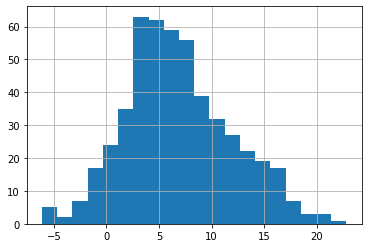

In [86]:
import matplotlib.pyplot as plt
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

In [ ]:
# !pip install pingouin
# import pingouin

In [93]:
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'],
y=0,
alternative='two-sided')
print(test_results)

# Conduct a t-test on diff unpaired
test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'],
y=sample_dem_data['dem_percent_16'],
alternative='two-sided')
print(test_results)

                T  dof alternative          p-val         CI95%   cohen-d   
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  1.354985  \

              BF10  power  
T-test  2.246e+111    1.0  
               T  dof alternative         p-val        CI95%   cohen-d   
T-test  7.181565  998   two-sided  1.345737e-12  [4.96, 8.7]  0.454202  \

             BF10  power  
T-test  4.308e+09    1.0  


# Anova Tests (Analysis of variance) 
- a test for differences between groups 
- more than 2 parameter
- visualizing multiple distributions
  - is mean annual compensation different for different level of job satisfaction?
  - import seaborn as sns
  - import matplotlib.pyplot as plt
  - sns.boxplot(x='converted_comp',y='job_sat',data=stack_overflow)
  - plt.show()
- how to do anova
  - alpha = 0.2
  - pingouin.anova(data=stack_overflow, dv='converted_comp', between = 'job_sat') --> dv is dependant variable
  - pairwise tests
    - pingouin.pairwise_tests(data=stack_overflow, dv='converted_comp', between = 'job_sat', padjust = 'none')
    - pingouin.pairwise_tests(data=stack_overflow, dv='converted_comp', between = 'job_sat', padjust = 'bonf') --> bonf stands for bonferroni correction to minimize false positive
       - padjust is p adjust consist of several methods as listed below:
         1. 'none': no correction [default]
         2. 'bonf': one-step Bonferroni correction
         3. 'sidak': one-step Sidak correction
         4. 'holm': step-down method using Bonferroni adjustments
         5. 'fdr_bh': Benjamini/Hochberg FDR correction
         6. 'fdr_by': Benjamini/Yekutieli FDR correction


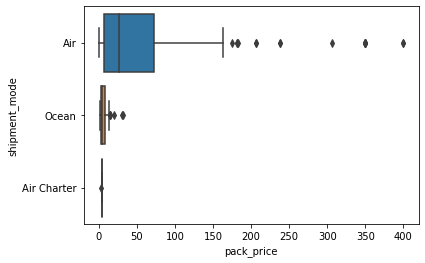

In [95]:
import seaborn as sns
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].mean()

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Boxplot of shipment_mode vs. pack_price
sns.boxplot(data=late_shipments, x='pack_price',y='shipment_mode')
plt.show()

In [98]:
# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data=late_shipments, dv='pack_price',between = 'shipment_mode')



# Print anova_results
print(anova_results)

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


In [100]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_tests(data=late_shipments, dv='pack_price',between ='shipment_mode',padjust='none' ) 

# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results_bonf = pingouin.pairwise_tests(data=late_shipments, dv='pack_price',between ='shipment_mode',padjust='bonf' ) 

# Print pairwise_results
print(pairwise_results)
print(pairwise_results_bonf)

        Contrast            A            B  Paired  Parametric          T   
0  shipment_mode          Air  Air Charter   False        True  21.179625  \
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc       BF10    hedges  
0  600.685682   two-sided  8.748346e-75  5.809e+76  0.726592  
1  986.979785   two-sided  6.934555e-71  1.129e+67  0.711119  
2   35.615026   two-sided  3.123012e-03     15.277 -0.423775  
        Contrast            A            B  Paired  Parametric          T   
0  shipment_mode          Air  Air Charter   False        True  21.179625  \
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc        p-corr p-adjust       BF10   
0  600.685682   two-sided  8.748346e-75  2.624504e-74

# one-sample proportion tests 
- chapter 1 recap:
  - is a claim about an unknown population proportion feasible?
    1. standard error of sample statistic from bootstrap distribution
    2. compute a standardized test statistic
    3. calculate a p-value
    4. decide which hypothesis made most sense
- lest's calculate the statistic without using the bootstrap distribution
  - p: population proportion(unknown population parameter
  - phat: sample proportion(sample statistic)
  - p0: hypothesized population proportion
  - t-distribution - fatter tails than a normal distribution
- bootstrapping can be used to estimate the standard error of any statistic, it is computationally intensive. For proportions, using a simple equation of the hypothesized proportion and sanmple size is easier to compute
- z_score =p_hat - p_0/np.sqrt(p_0*(1-p_0)/n)

In [101]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late']=='Yes').mean()

# Calculate the sample size
n = len(late_shipments)

# Print p_hat and n
print(p_hat, n)

0.061 1000


In [102]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat-p_0
denominator = np.sqrt(p_0*(1-p_0)/n)

# Calculate the test statistic
z_score = numerator/denominator

# Print the result
print(z_score)

0.13315591032282698


In [103]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator

# Calculate the p-value from the z-score
p_value = 1-norm.cdf(z_score,loc=0,scale=1)

# Print the p-value
print(p_value)

0.44703503936503364


# Two-sample proportion tests 
- comparing two proportions
  - H0: proportion of hobbyist users is the same for those under thirty as those at least thirty H0: p>=30 - p<30 = 0
  - HA: proportion of hobbyist users is different for those under thirty as those at least thirty HA: p>=30 - p<30 != 0
- only require phat>=30, phat<30, n>=30, n<30
  1. p_hats = stack_overflow.groupby('age_cat')['hobbyist'].value_counts(normalize=True)
  2. n = stack_overflow.groupby('age_cat')['hobbyist'].count()
  3. p_hat_at_least_30 = p_hats[('At least 30','Yes')]
  4. p_hat_under_30=p_hats["under 30",'Yes')]
  5. n_at_least_30 = n['At least 30']
  6. n_under_30 = n['Under 30']
  7. p_hat (n_at_least30 x p_hat_at_least_30 +n_under_30 xp_hat_under_30)/(n_at_least_30 + n_under_30)
  8. std_error = np.sqrt(p_hat*(1-p_hat)/n_at_least_30+p_hat*(1-p_hat)/n_under_30)
  9. z_score=p_hat_at_least_30-p_hat_under_30)/std_error
 
-- OR 
  1. stack_overflow.groupby('age_cat')['hobbyist'].value_counts()
  2. n_hobbyists = np.array([812,1021])
  3. n_rows = np_array([812+238,1021+190])
  4. from statsmodels.stats.proportion import proportions_ztest
  5. zscore,p_value = proportions_ztest(count=n_hobbyists, nobs=n_rows, alternative = 'two-sided') 

In [155]:
p_hats = late_shipments.groupby('freight_cost_groups')['late'].value_counts(normalize=True)

ns= late_shipments.groupby('freight_cost_groups')['id'].count()
# Calculate the pooled estimate of the population proportion
p_hat = (p_hats[("reasonable","Yes")] * ns["reasonable"] + p_hats[("expensive","Yes")] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Print the result
# print(std_error)

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Calculate the z-score
z_score = (p_hats[("expensive","Yes")] - p_hats[("reasonable","Yes")]) / std_error

# Calculate the p-value from the z-score
p_value = 1-norm.cdf(z_score,loc=0,scale=1)

# Print p_value
print(p_value)


0.0017353400023595311


In [ ]:
# !pip install statsmodels
# from statsmodels.stats.proportion import proportions_ztest 


In [161]:
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_groups")['late'].value_counts()

# Create an array of the "Yes" counts for each freight_cost_group
success_counts = np.array([45, 16])

# Create an array of the total number of rows in each freight_cost_group
n = np.array([545, 439+16])

# Run a z-test on the two proportions
stat, p_value = proportions_ztest(count=success_counts, nobs=n, alternative = 'larger')


# Print the results
print(stat, p_value)

3.1190401865206128 0.0009072060637051224


# Chi-Square test of independence 
- The chi-square independence test compares proportions of successes of one categorical variable across the categories of another categorical variable.
- statistical independence - proportion of sucesses in the response variable is the same across all categories of the explanatory variable
- how?
  - import pingouin
  - expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x='hobbbyist', y='age_cat', correction = False) --> the correction argument specifies whether or not to apply Yates' continuity correction whic is a fudge factor for when the sample size is very small and the degrees of freedom is one
- example of hypothesis:
  1. H0: age categories are independent of job satisfaction levels
  2. HA: age categories are not independent of job satisfaction levels
  3. alpha = 0.1
  4. assuming independence, how far away are the observed results from the expected values?
  5. props = stack_overflow.groupby('job_sat')['age_cat'].value_counts(normalize=True)
  6. wide_props=props.unstack()
  7. wide_props.plot(kind='bar',stacked=True)
  8. import pingouin
  9. expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x='jo_sat', y = 'age_cat')
  10. degrees of freedom : (no of response categories -1) x(no of explanatory categories -1) = 4

- chi square observed and expected counts squared must be non-negative
- chi-square tests are almost always right-tailed because not negative 

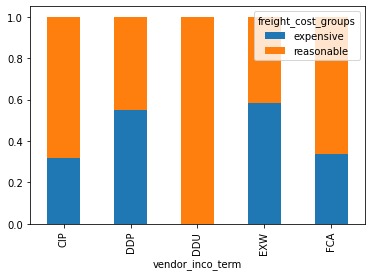

      test  lambda       chi2  dof          pval    cramer     power
0  pearson     1.0  34.805072  4.0  5.093922e-07  0.186561  0.999235


/Users/tiatitisari/opt/anaconda3/lib/python3.8/site-packages/pingouin/contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/Users/tiatitisari/opt/anaconda3/lib/python3.8/site-packages/pingouin/contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/Users/tiatitisari/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_py.py:7416: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/Users/tiatitisari/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_py.py:7416: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/Users/tiatitisari/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_py.py:7413: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


In [165]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)

# Convert props to wide format
wide_props = props.unstack()

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind='bar', stacked=True)
plt.show()

# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data=late_shipments, x='freight_cost_groups', y='vendor_inco_term')

# Print results
print(stats[stats['test'] == 'pearson']) 

# chi-square goodness of fit tests 
- compare single categorical variable to a hypothesized distribution
- how do you feel when you discover that you've already visited the top resource?
  1. purple_link_counts=stack_overflow['purple_link'].value_counts()
  2. purple_link_counts=purple_link_counts.rename_axis('purple_link')\.reset_index(name='n')\.sort_values('purple_link')
  3. declaring the hypotheses
  4. hypothesized = pd.DAtaFrame({'purple_link':['Amused','Annoyed', 'Hello, old friend', 'Indifferent'], 'prop':[1/6,1/6,1/2,1/6]})
  5. H0: The sample matches the hypothesized distribution
  6. HA: The sample does not match the hypothesized distribution
     - alpha = 0.01
     - n_total = len(stack_overflow)
     - hypothesized["n"]=hypothesized["prop"]*n_total
     - visualizing counts
     - import matplotlib.pyplot as plt
     - plt.bar(purple_link_counts['purple_link'],purple_link_counts['n'], color='red', label='Observed')
     - plt.bar(hypothesized['purple_link'],hypothesized['n'], alpha=0.5, color='blue', label='Hypothesized')
     - plt.legend()
     - plt.show()
     - need to run hypothesis test to see if the difference is statistically significant >> chi-square goodness of fit test >> to test how well our hypothesized data fits the observed data 
       1. from scipy.stats import chisquare
       2. chisquare(f_obs=purple_link_counts['n'], f_exp = hypothesized['n']) 

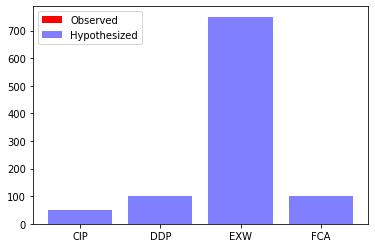

In [254]:
dict = {'vendor_inco_term':['CIP', 'DDP', 'EXW', 'FCA'], 'prop':[0.05, 0.10, 0.75, 0.10]}
hypothesized = pd.DataFrame(dict)


incoterm_counts = late_shipments[late_shipments['vendor_inco_term'].isin(['CIP','DDP','EXW','FCA'])]['vendor_inco_term'].value_counts(normalize=True)
incoterm_counts = incoterm_counts.rename_axis('vendor_inco_term').reset_index(name='n').sort_values('vendor_inco_term')

# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Create n column that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color="red", label="Observed")

# Add a blue bar plot for the hypothesized counts
plt.bar(hypothesized['vendor_inco_term'], hypothesized['n'], color="blue",alpha=0.5, label="Hypothesized")
plt.legend()
plt.show()

In [255]:
from scipy.stats import chisquare 
# Perform a goodness of fit test on the incoterm counts n
gof_test = chisquare(f_obs=incoterm_counts['n'], f_exp=hypothesized['prop'])

# Print gof_test results
print(gof_test)

Power_divergenceResult(statistic=0.0023657290924558143, pvalue=0.9999694185469544)


# Assumptions in hypothesis testing 
- Randomness
  1. Assumption: the samples are random subsets of larger populations
  2. Consequence: Sample is not representative of population
  3. How to check this?
     - Understand how your data was collected
     - Speak to the data collector/domain expert

- Independence of observations
  1. assumption : each observation (row) in the dataset is independent
  2. Consequence: increased chance of false negative/positive error
  3. How to check this?
     - Understand how your data was collected

- Large sample size
  1. Assumption: the sample is bit enough to mitigate uncertainty, so that the Central Limit Theorem applies
  2. Consequence: Wider confidence intervals, Increased chance of false negative/positive test 
  3. How to check this
     - depend on the test
  4. Large sample size: t-test
     - One sample : at least 30 observations in the sample n>=30 n: sample size
     - Two sample: At least 30 observations in each sample n1>=30, n2>=30 ni: sample size for group i
     - ANOVA: at least 30 observations in each sample ni>=30 for all values of i
     - Paired samples: At least 30 pairs of observations accross the sample number of rows in our data >= 30
  5. Large sample size: proportion tests
     - One sample number of successes in sample is greater than or equal to 10 nxphat>=10
        - number of failures in sample is greater than or equal to 10 nx(1-phat)>=10, n=sample size, phat: proportion of success in sample
     - two sample number of success in each sample is greater than or equal to 10, n1x phat1 >=10 n2xphat2>=10 
        - number of failures in each sample is greater than or equal to 10 n1 x (1-phat1) >=10, n2 x(1-phat2)>=10
     - chi-square tests the number of successes in each group in greather than or equal to 5 nixphati>=5 for all values of i
        - the number of failures in each group in greater than or equal to 5 nix(1-phati)>=5 for all values of i

- Sanity Check
  - if the bootstrap distribution doesnt look normal, assumptions likely aren't valid
  - revisit data collection to check for randomness, independence, and sample size 

In [259]:
# Count the freight_cost_group values
counts = late_shipments['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

# Count the late values
counts = late_shipments['late'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 10).all())

# Count the values of freight_cost_group grouped by vendor_inco_term
counts = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 5).all())

freight_cost_groups
expensive     531
reasonable    455
Name: count, dtype: int64
True
late
No     939
Yes     61
Name: count, dtype: int64
True
vendor_inco_term  freight_cost_groups
CIP               reasonable              34
                  expensive               16
DDP               expensive               55
                  reasonable              45
DDU               reasonable               1
EXW               expensive              423
                  reasonable             302
FCA               reasonable              73
                  expensive               37
Name: count, dtype: int64
False


In [260]:
# Count the shipment_mode values
counts = late_shipments['shipment_mode'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

shipment_mode
Air            906
Ocean           88
Air Charter      6
Name: count, dtype: int64
False


# Non Parametric Tests 
- z-test, t-test, and ANOVA are all parametric tests
- Assuma a normal distribution
- Require sample size enough that Central limit theorem applied
- if the assumption not met, we can use non-parametric tests. NOn-parametric tests are more reliable than parametric tests for small sample sizes and when data isn't normally distributed 
  1. Ranks of the data
     - from scipy.stats import rankdata
     - rankdata(x) 
  3. Wilcoxon-signed rank test
     - Works on the ranked absolute differences between the pairs of data
     - repub_votes_small['diff']=repub_votes_small['repub_percent_08']-repub_votes_small['repub_percent_12']
     - repub_votes_small['abs_diff']=repub_votes_small['diff'].abs()
     - incorporate the sum of the ranks for negative and positive differences
     - T_minus = is the sum of the ranks with negative differences
     - T_plus = is the sum of the ranks with positive differences
     - W = np.min([T_minus, T_plus])
     - alpha =0.01
     - pingouin.wilcoxon(x=repub_votes_small['repub_percent_08'],y=repub_votes_small['repub_percent_12'],alternative='less')

In [262]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'],y=sample_dem_data['dem_percent_16'], paired=True, alternative='greater') 

# Print paired t-test results
print(paired_test_results)

# Conduct a Wilcoxon test on dem_percent_12 and dem_percent_16
wilcoxon_test_results = pingouin.wilcoxon(x=sample_dem_data['dem_percent_12'],y=sample_dem_data['dem_percent_16'], alternative='greater') 



# Print Wilcoxon test results
print(wilcoxon_test_results)

                T  dof alternative          p-val        CI95%   cohen-d   
T-test  30.298384  499     greater  1.800317e-115  [6.46, inf]  0.454202  \

              BF10  power  
T-test  4.491e+111    1.0  
             W-val alternative         p-val       RBC      CLES
Wilcoxon  122849.0     greater  8.901980e-78  0.961661  0.644816


# Non - parametric ANOVA and unpaired t-test
- also know as the Mann Whitney U test
  1. A t-test on the ranks of the numeric input
  2. Works in unpaired data
  3. age_vs_comp= stack_overflow[['converted_comp','age_first_code_cut']]
  4.  age_vs_comp_wide=age_vs_comp_pivot(columns='age_first_code_cut',values='converted_comp')
  5.  alpha = 0.01
  6.  import pingouin
  7.  pingouin.mwu(x=age_vs_comp_wide['child'],y=age_vs_comp_wide['adult'],alternative='greater')

- Kruskal-WAllis test is to Wilcoxon-Mann-whitney test as ANOVA is to t-test
  1. alpha = 0.01
  2. pingouin.kruskal(data=stack_overflow, dv='converted_comp', between = 'job_sat')

In [268]:
# Select the weight_kilograms and late columns
weight_vs_late = late_shipments[['late','weight_kilograms']]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns='late', 
                                           values='weight_kilograms')


# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(x=weight_vs_late_wide['No'], y =weight_vs_late_wide['Yes'])



# Print the test results
print(wmw_test)

       U-val alternative     p-val       RBC      CLES
MWU  19134.0   two-sided  0.000014  0.331902  0.334049


In [269]:
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(data=late_shipments, dv='weight_kilograms', between = 'shipment_mode')



# Print the results
print(kw_test)

                Source  ddof1           H         p-unc
Kruskal  shipment_mode      2  125.096618  6.848799e-28
